# Tweet Text Intent

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [68]:
df = pd.read_excel("Tweet_NFT.xlsx")
df

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762.0,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community
1,1212763.0,Need Sick Character artâ_x009d_“#art #artist #...,2022-08-06T16:56:36.000Z,Giveaway
2,1212765.0,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation
3,1212766.0,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community
4,1212767.0,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community
...,...,...,...,...
127448,1278721.0,"@Jason My company Universe is solving this, an...",2022-08-08T03:32:01.000Z,NaN
127449,1278723.0,@BosoTokyo Many will get rekt in this NFT,2022-08-08T03:32:00.000Z,NaN
127450,1278724.0,@leeneedham81 @KibaInuWorld @HODL_OFFICIAL @Ko...,2022-08-08T03:32:00.000Z,NaN
127451,1278725.0,@1kz3ro @UNLEASHED_NFT I love this job,2022-08-08T03:31:59.000Z,NaN


In [69]:
df.isnull().sum()

id                      0
tweet_text              0
tweet_created_at        0
tweet_intent        31089
dtype: int64

<AxesSubplot:>

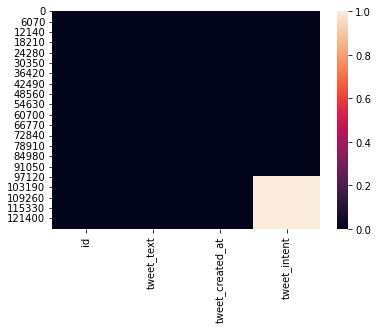

In [70]:
sns.heatmap(df.isnull())

## Feature Engineering 

In [71]:
df['Stringlength'] = df['tweet_text'].str.len()
df.head()

,id,tweet_text,tweet_created_at,tweet_intent,Stringlength
0,1212762.0,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community,483
1,1212763.0,Need Sick Character artâ_x009d_“#art #artist #...,2022-08-06T16:56:36.000Z,Giveaway,300
2,1212765.0,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation,95
3,1212766.0,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community,284
4,1212767.0,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community,272


#### Checking for blank spaces, random characters in each column

In [72]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for c in df:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((df[c] == s).sum())

  in id =  0
? in id =  0
- in id =  0
 ? in id =  0
 - in id =  0
?  in id =  0
-  in id =  0
 ?  in id =  0
 -  in id =  0
NA in id =  0
N/A in id =  0
 NA in id =  0
 N/A in id =  0
  in tweet_text =  0
? in tweet_text =  0
- in tweet_text =  0
 ? in tweet_text =  0
 - in tweet_text =  0
?  in tweet_text =  0
-  in tweet_text =  0
 ?  in tweet_text =  0
 -  in tweet_text =  0
NA in tweet_text =  0
N/A in tweet_text =  0
 NA in tweet_text =  0
 N/A in tweet_text =  0
  in tweet_created_at =  0
? in tweet_created_at =  0
- in tweet_created_at =  0
 ? in tweet_created_at =  0
 - in tweet_created_at =  0
?  in tweet_created_at =  0
-  in tweet_created_at =  0
 ?  in tweet_created_at =  0
 -  in tweet_created_at =  0
NA in tweet_created_at =  0
N/A in tweet_created_at =  0
 NA in tweet_created_at =  0
 N/A in tweet_created_at =  0
  in tweet_intent =  0
? in tweet_intent =  0
- in tweet_intent =  0
 ? in tweet_intent =  0
 - in tweet_intent =  0
?  in tweet_intent =  0
-  in tweet_intent

There are no blank spaces or characters in any column

In [73]:
df['tweet_intent'].value_counts()

Community         41510
Giveaway          21041
Appreciation      16451
Whitelist          8320
Presale            5107
Done               3049
pinksale            477
Interested          276
Launching Soon      133
Name: tweet_intent, dtype: int64

<AxesSubplot:xlabel='tweet_intent', ylabel='count'>

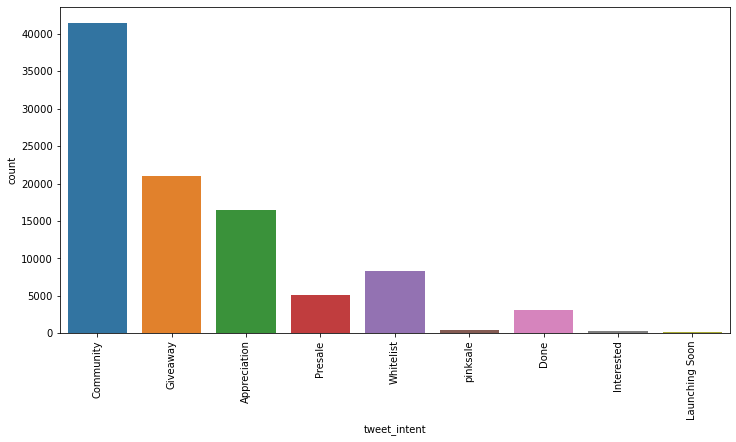

In [74]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)

sns.countplot(df['tweet_intent'])

Here we notice that tweet intent has more count on community and low on launching soon

In [75]:
import re
def remove_usernames_links(tweet_text):
    tweet_text = re.sub('@[^\s]+',' ',str(tweet_text))
    tweet_text = re.sub('http[^\s]+',' ',str(tweet_text))
    return tweet_text
df['tweet_text'] = df['tweet_text'].apply(remove_usernames_links)

In [76]:
df.tweet_text.values

array(["                            ðŸ_x0090_¶ A new cryptocurrency was born by fans of the Chihuahua meme community. It's just simply pets love and keep 1% from each transaction which will be automatically distributed. \nâ€¼ï¸_x008f_CA: 0x2fd6c9B869Dea106730269E13113361b684f843a\n  \nTG:  ",
       'Need Sick Character artâ_x009d_“#art #artist #Artists #animation #illustrators #illustrations #illustrationart #NFT #NFTGiveaways #3Danimation #3dart #conceptart #Concept #illustrators #SolanaNFTs #ArtistOnTwitter            ',
       '          Great choice on a Tesla! Good luck!', ...,
       '          100% of $HODL #HODL HANDS #NFT funds stay in the project\n\nWhen #minted we will have \n(#BNB     \n\nBnB rewards $594,000\nMarketing     $594,000\nProject fund $594,000\nBuy back      $198,000\n\nGet ready for parabolic âœŠðŸ“ˆ\nðŸ”Ž  \n\nMint\n ',
       '    I love this job', '    my proof  '], dtype=object)

In [77]:
df.head()

,id,tweet_text,tweet_created_at,tweet_intent,Stringlength
0,1212762.0,ðŸ_x0090_¶ A new c...,2022-08-06T16:56:36.000Z,Community,483
1,1212763.0,Need Sick Character artâ_x009d_“#art #artist #...,2022-08-06T16:56:36.000Z,Giveaway,300
2,1212765.0,Great choice on a Tesla! Good luck!,2022-08-06T16:56:35.000Z,Appreciation,95
3,1212766.0,The first project in crypto with move to e...,2022-08-06T16:56:35.000Z,Community,284
4,1212767.0,The first project in crypto with move to ear...,2022-08-06T16:56:34.000Z,Community,272


In [78]:
# Convert all messages to lower case
df['tweet_text'] = df['tweet_text'].str.lower()

# Replace URLs with 'webaddress'
df['tweet_text'] = df['tweet_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

df['tweet_text'] = df['tweet_text'].str.replace(r'£|\$', 'dollars')# Replace money symbols with 'moneysymb' 

# Replacing 10 digit phone numbers with 'phonenumber'
df['tweet_text'] = df['tweet_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

df['tweet_text'] = df['tweet_text'].str.replace(r'\d+(\.\d+)?','num') # Replace numbers with 'num'

df['tweet_text'] = df['tweet_text'].str.replace(r'[^\w\d\s]',',') #removing punctuations

df['tweet_text'] = df['tweet_text'].str.replace(r'[\_]',' ') #removing underscore characters

df['tweet_text'] = df['tweet_text'].str.replace(r'\s+[a-zA-Z]\s+', ' ') #removing single characters

df['tweet_text'] = df['tweet_text'].str.replace(r'\s+', ' ') #removing whitespace between terms with a single space

df['tweet_text'] = df['tweet_text'].str.replace(r'^\s+|\s+?$', ' ') #removing leading and trailing whitespace

In [79]:
df.head()

,id,tweet_text,tweet_created_at,tweet_intent,Stringlength
0,1212762.0,"ðÿ xnum , new cryptocurrency was born by fans...",2022-08-06T16:56:36.000Z,Community,483
1,1212763.0,"need sick character artâ xnumd ,,art ,artist ,...",2022-08-06T16:56:36.000Z,Giveaway,300
2,1212765.0,"great choice on tesla, good luck,",2022-08-06T16:56:35.000Z,Appreciation,95
3,1212766.0,the first project in crypto with move to earn...,2022-08-06T16:56:35.000Z,Community,284
4,1212767.0,the first project in crypto with move to earn...,2022-08-06T16:56:34.000Z,Community,272


In [80]:
df.tweet_text.values

array([' ðÿ xnum , new cryptocurrency was born by fans of the chihuahua meme community, it,s just simply pets love and keep num, from each transaction which will be automatically distributed, â,¼ï, xnumf ca, numxnumfdnumcnumbnumdeanumenumbnumfnuma tg, ',
       'need sick character artâ xnumd ,,art ,artist ,artists ,animation ,illustrators ,illustrations ,illustrationart ,nft ,nftgiveaways ,numdanimation ,numdart ,conceptart ,concept ,illustrators ,solananfts ,artistontwitter ',
       ' great choice on tesla, good luck,', ...,
       ' num, of dollarshodl ,hodl hands ,nft funds stay in the project when ,minted we will have ,,bnb bnb rewards dollarsnum,num marketing dollarsnum,num project fund dollarsnum,num buy back dollarsnum,num get ready for parabolic âœšðÿ,ˆ ðÿ,ž mint ',
       ' love this job', ' my proof '], dtype=object)

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

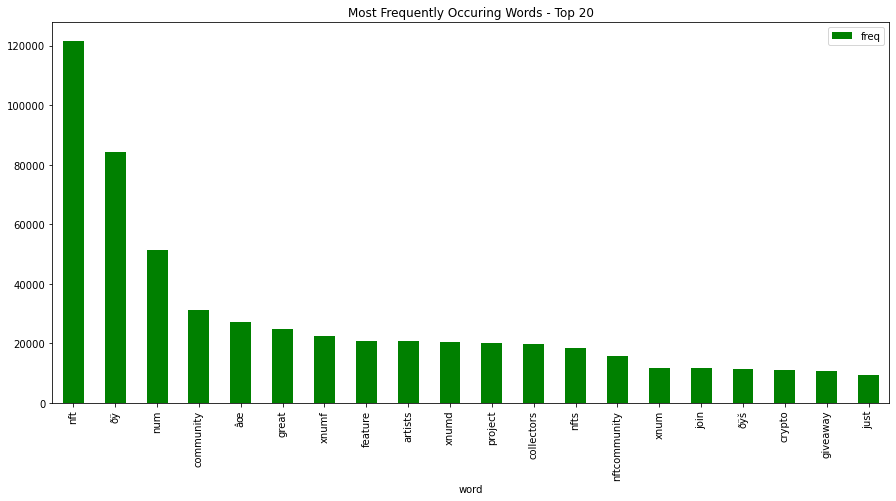

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords,wordnet

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.tweet_text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'green')
plt.title("Most Frequently Occuring Words - Top 20")

THE MOST USED WORDS ARE ARRANGED IN ASCENDING ORDER SHOWN IN GRAPH

In [81]:
from wordcloud import WordCloud

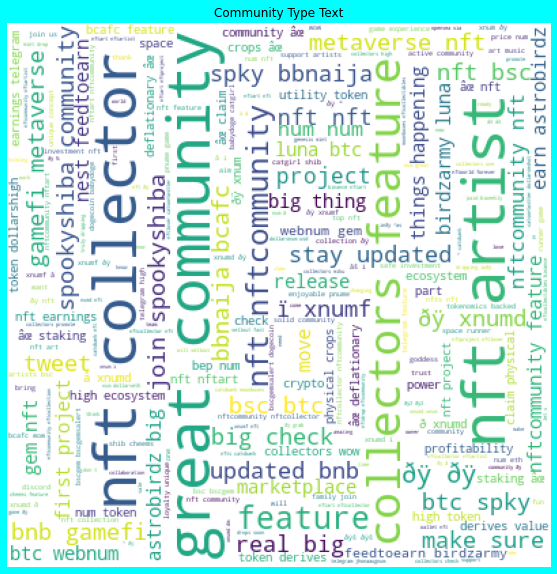

In [82]:
intent=df['tweet_text'][df['tweet_intent']=='Community']
wrdcld= WordCloud(width=400,height=400,background_color='white',max_words=400).generate(' '.join(intent))
plt.figure(figsize=(10,10),facecolor = 'cyan')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Community Type Text')
plt.show()


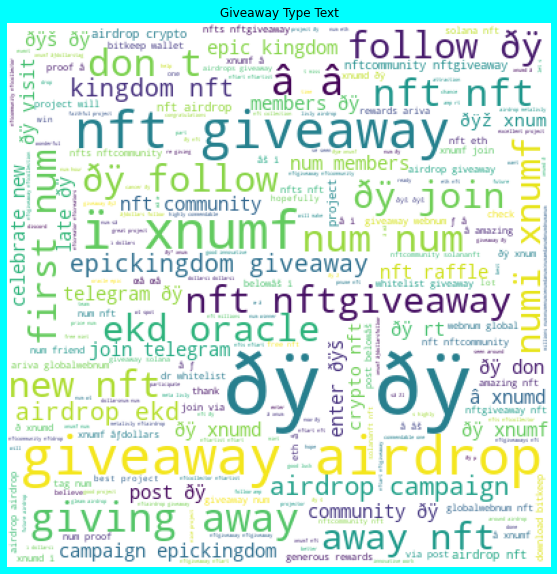

In [19]:
intent=df['tweet_text'][df['tweet_intent']=='Giveaway']
wrdcld= WordCloud(width=400,height=400,background_color='white',max_words=400).generate(' '.join(intent))
plt.figure(figsize=(10,10),facecolor = 'cyan')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Giveaway Type Text')
plt.show()

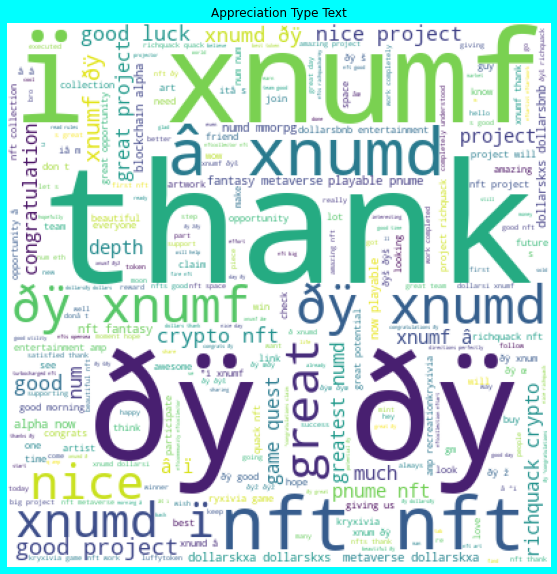

In [20]:
intent=df['tweet_text'][df['tweet_intent']=='Appreciation']
wrdcld= WordCloud(width=400,height=400,background_color='white',max_words=400).generate(' '.join(intent))
plt.figure(figsize=(10,10),facecolor = 'cyan')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Appreciation Type Text')
plt.show()

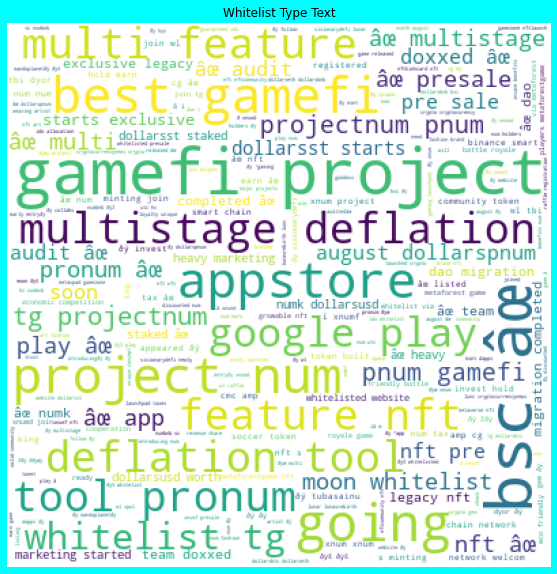

In [21]:
intent=df['tweet_text'][df['tweet_intent']=='Whitelist']
wrdcld= WordCloud(width=400,height=400,background_color='white',max_words=400).generate(' '.join(intent))
plt.figure(figsize=(10,10),facecolor = 'cyan')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Whitelist Type Text')
plt.show()

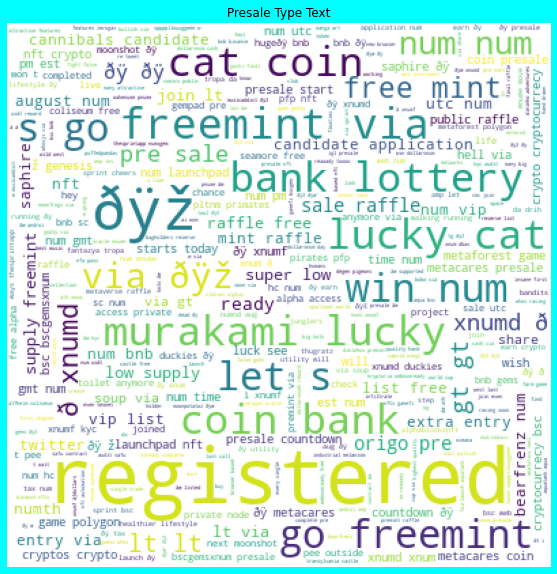

In [22]:
intent=df['tweet_text'][df['tweet_intent']=='Presale']
wrdcld= WordCloud(width=400,height=400,background_color='white',max_words=400).generate(' '.join(intent))
plt.figure(figsize=(10,10),facecolor = 'cyan')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Presale Type Text')
plt.show()

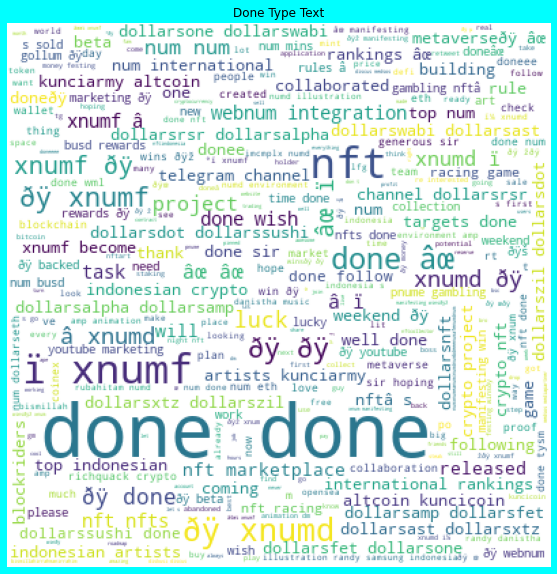

In [23]:
intent=df['tweet_text'][df['tweet_intent']=='Done']
wrdcld= WordCloud(width=400,height=400,background_color='white',max_words=400).generate(' '.join(intent))
plt.figure(figsize=(10,10),facecolor = 'cyan')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Done Type Text')
plt.show()

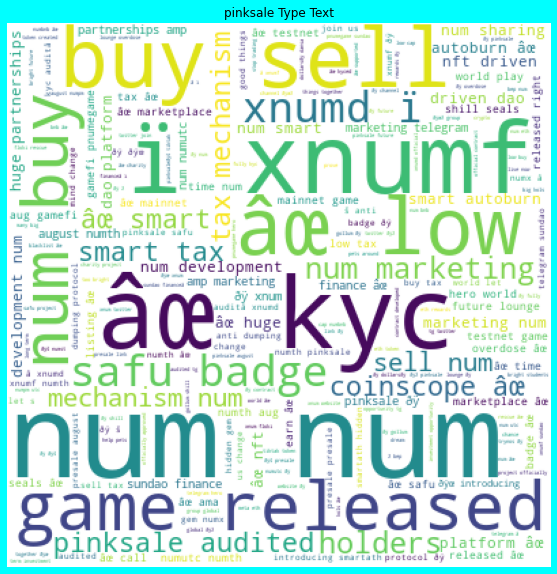

In [24]:
intent=df['tweet_text'][df['tweet_intent']=='pinksale']
wrdcld= WordCloud(width=400,height=400,background_color='white',max_words=400).generate(' '.join(intent))
plt.figure(figsize=(10,10),facecolor = 'cyan')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='pinksale Type Text')
plt.show()

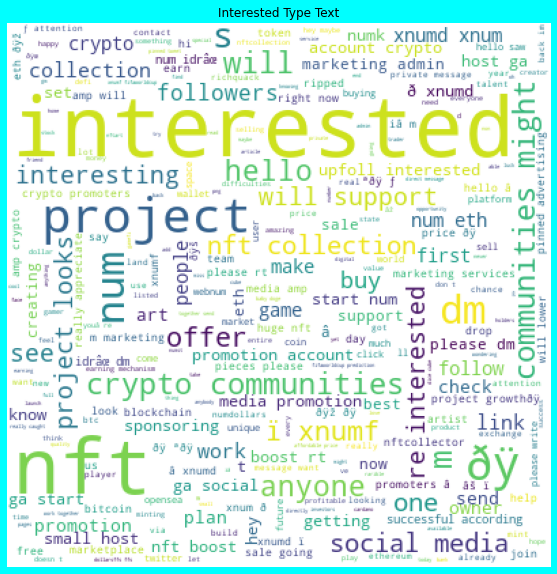

In [25]:
intent=df['tweet_text'][df['tweet_intent']=='Interested']
wrdcld= WordCloud(width=400,height=400,background_color='white',max_words=400).generate(' '.join(intent))
plt.figure(figsize=(10,10),facecolor = 'cyan')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Interested Type Text')
plt.show()

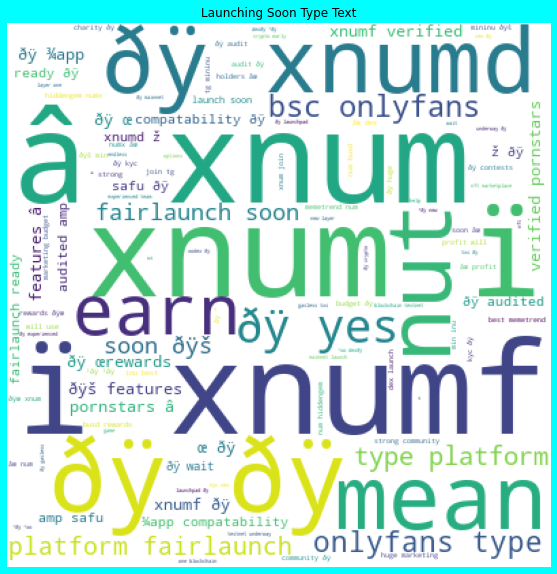

In [26]:
intent=df['tweet_text'][df['tweet_intent']=='Launching Soon']
wrdcld= WordCloud(width=400,height=400,background_color='white',max_words=400).generate(' '.join(intent))
plt.figure(figsize=(10,10),facecolor = 'cyan')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Launching Soon Type Text')
plt.show()

Some special characters are present which are no use for prediction , so removing them

In [27]:
df.tweet_text.sample()

74310     â,œcrazy bunch of misfitsâ, xnumd ,anime ,man...
Name: tweet_text, dtype: object

In [28]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vikram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
stop_words = set(stopwords.words('english') + ['u','m', 'ü', 'ur', '4', '2', 'im', 'dont','ðÿš',
                                               'doin',"u're", 'ure','ðÿ','âœšðÿ','ž','â','¼ï','âœšðÿ','ˆ ðÿ','âœ'])
df['tweet_text'] = df['tweet_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [30]:
lem=WordNetLemmatizer()
df['tweet_text'] = df['tweet_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [31]:
df.head()

,id,tweet_text,tweet_created_at,tweet_intent,Stringlength
0,1212762.0,"xnum , new cryptocurrency born fan chihuahua m...",2022-08-06T16:56:36.000Z,Community,483
1,1212763.0,"need sick character artâ xnumd ,,art ,artist ,...",2022-08-06T16:56:36.000Z,Giveaway,300
2,1212765.0,"great choice tesla, good luck,",2022-08-06T16:56:35.000Z,Appreciation,95
3,1212766.0,"first project crypto move earn ,astrobirdz, bi...",2022-08-06T16:56:35.000Z,Community,284
4,1212767.0,"first project crypto move earn ,astrobirdz, bi...",2022-08-06T16:56:34.000Z,Community,272


In [32]:
df['Cleaned_Stringlength'] = df['tweet_text'].str.len()
df.head()

,id,tweet_text,tweet_created_at,tweet_intent,Stringlength,Cleaned_Stringlength
0,1212762.0,"xnum , new cryptocurrency born fan chihuahua m...",2022-08-06T16:56:36.000Z,Community,483,190
1,1212763.0,"need sick character artâ xnumd ,,art ,artist ,...",2022-08-06T16:56:36.000Z,Giveaway,300,217
2,1212765.0,"great choice tesla, good luck,",2022-08-06T16:56:35.000Z,Appreciation,95,30
3,1212766.0,"first project crypto move earn ,astrobirdz, bi...",2022-08-06T16:56:35.000Z,Community,284,166
4,1212767.0,"first project crypto move earn ,astrobirdz, bi...",2022-08-06T16:56:34.000Z,Community,272,166


the tweet text are cleaned therefore to moch extent
as @, has been removed as @ is used for taggging some person or page not so useful in training and removed characters too.



In [33]:
#droppinf unwanted columns 
df.drop(['tweet_created_at','id','Cleaned_Stringlength','Stringlength'],inplace = True,axis=1)
df.head()

,tweet_text,tweet_intent
0,"xnum , new cryptocurrency born fan chihuahua m...",Community
1,"need sick character artâ xnumd ,,art ,artist ,...",Giveaway
2,"great choice tesla, good luck,",Appreciation
3,"first project crypto move earn ,astrobirdz, bi...",Community
4,"first project crypto move earn ,astrobirdz, bi...",Community


In [34]:
df[df['tweet_intent'].isnull()].index

Int64Index([ 96364,  96365,  96366,  96367,  96368,  96369,  96370,  96371,
             96372,  96373,
            ...
            127443, 127444, 127445, 127446, 127447, 127448, 127449, 127450,
            127451, 127452],
           dtype='int64', length=31089)

### splitting dataframe by row index

In [35]:
df_train = df.iloc[:96364,:]
df_test = df.iloc[96364:,:]

In [36]:
df_train.shape

(96364, 2)

In [37]:
df_train.isnull().sum()

tweet_text      0
tweet_intent    0
dtype: int64

In [38]:
df_test.isnull().sum()

tweet_text          0
tweet_intent    31089
dtype: int64

In [39]:
df_train.head()

,tweet_text,tweet_intent
0,"xnum , new cryptocurrency born fan chihuahua m...",Community
1,"need sick character artâ xnumd ,,art ,artist ,...",Giveaway
2,"great choice tesla, good luck,",Appreciation
3,"first project crypto move earn ,astrobirdz, bi...",Community
4,"first project crypto move earn ,astrobirdz, bi...",Community


In [40]:
df_test.head()

,tweet_text,tweet_intent
96364,"num, ðÿ,,â, xnumd â,,ï, xnumf ,wizardia nfts ,...",NaN
96365,"don,t miss chance win nft worth numeach simple...",NaN
96366,zesty faucet making tweet claim free nefty tok...,NaN
96367,"num, ðÿ,,â, xnumd â,,ï, xnumf ,wizardia nfts ,...",NaN
96368,"message me, letâ,,s talk marketing project",NaN


In [41]:
df_test.to_csv('df_tweet_test.csv')

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
tf_vec = TfidfVectorizer(max_features=50000,smooth_idf=False, stop_words='english')

In [44]:
features = tf_vec.fit_transform(df_train['tweet_text'])

In [45]:
X = features
y=df_train['tweet_intent']

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


### Balancing out classes in Label column using SMOTE technique.

In [47]:
from imblearn.over_sampling import SMOTE as sm

smt_x,smt_y = sm().fit_resample(X,y)

<AxesSubplot:xlabel='tweet_intent', ylabel='count'>

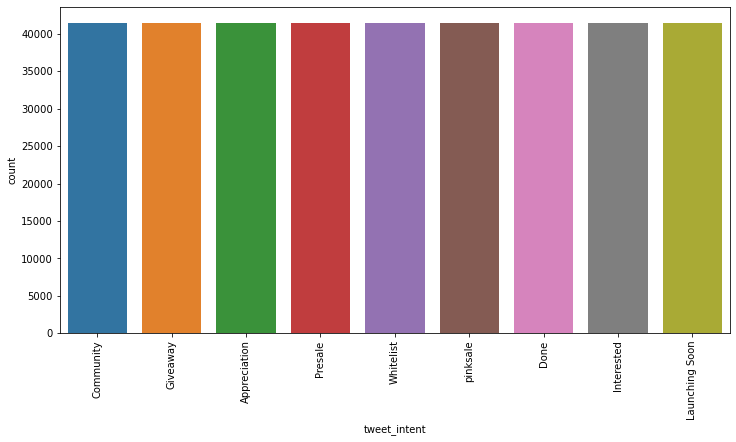

In [48]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)

sns.countplot(smt_y)

NOW THE DATA IS BALANCED AND FREE FROM BIAS 

## Model Building

### This is a Classification problem since Target column ('tweet_intent') has Catergorical type of Data.

In [49]:
from sklearn.naive_bayes import MultinomialNB
maxAcc = 0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .22, random_state = i)
    modMNB =  MultinomialNB()
    modMNB.fit(x_train,y_train)
    pred = modMNB.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.9217666382771627 on random_state: 29


In [51]:
x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .22,random_state = 29)

## Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

lo=LogisticRegression()
lo.fit(x_train,y_train)
lo.score(x_train,y_train)
predlo=lo.predict(x_test)


print('Accuracy Score is''\n',accuracy_score(y_test,predlo))
print('Confusion Matrix''\n',confusion_matrix(y_test,predlo))
print(classification_report(y_test,predlo))

Accuracy Score is
 0.959605791458815
Confusion Matrix
 [[8319    5  680   11   14    1   17   40    0]
 [  68 8834   73   13    7    0    6  154    0]
 [  27    7 8882    6    5    0   16   31    0]
 [ 204   76  481 8398    3    0   24   72    0]
 [   0    0    0    0 9120    0    0    0    0]
 [   0    0    0    0    0 9138    0    0    0]
 [  17    5   58    8    3    0 9004   12    0]
 [ 172  307  607   33    2    3   46 7939    6]
 [   0    0    0    0    0    0    0    0 9236]]
                precision    recall  f1-score   support

  Appreciation       0.94      0.92      0.93      9087
     Community       0.96      0.96      0.96      9155
          Done       0.82      0.99      0.90      8974
      Giveaway       0.99      0.91      0.95      9258
    Interested       1.00      1.00      1.00      9120
Launching Soon       1.00      1.00      1.00      9138
       Presale       0.99      0.99      0.99      9107
     Whitelist       0.96      0.87      0.91      9115
      p

## Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)

print('Accuracy score''\n',accuracy_score(y_test,pred_rfc))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_rfc))
print('Classification Report''\n',classification_report(y_test,pred_rfc))

Accuracy score
 0.9835259763961552
Confusion Matrix
 [[8966    3   57   13    0    0   11   37    0]
 [  74 8922    9   20    2    0    3  125    0]
 [  17    2 8922   11    0    0    9   13    0]
 [ 184   57  150 8815    1    0   18   33    0]
 [   0    0    0    0 9120    0    0    0    0]
 [   0    0    0    0    0 9138    0    0    0]
 [   3    1   10    2    0    0 9085    6    0]
 [  79  247   60   49    1    3   39 8633    4]
 [   0    1    0    0    0    0    0    0 9235]]
Classification Report
                 precision    recall  f1-score   support

  Appreciation       0.96      0.99      0.97      9087
     Community       0.97      0.97      0.97      9155
          Done       0.97      0.99      0.98      8974
      Giveaway       0.99      0.95      0.97      9258
    Interested       1.00      1.00      1.00      9120
Launching Soon       1.00      1.00      1.00      9138
       Presale       0.99      1.00      0.99      9107
     Whitelist       0.98      0.95      0

## Multinomial Naive Bayes

In [60]:
from sklearn.naive_bayes import MultinomialNB

MNB=MultinomialNB()
MNB.fit(x_train,y_train)
pred_MNB=MNB.predict(x_test)

print('Accuracy score''\n',accuracy_score(y_test,pred_MNB))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_MNB))
print('Classification Report''\n',classification_report(y_test,pred_MNB))

Accuracy score
 0.9217666382771627
Confusion Matrix
 [[8348  169   85  304   76   18   23   58    6]
 [ 501 7600  122  762   62    2    7   92    7]
 [ 314   22 7855  118   98  218   49   36  264]
 [ 346   63  181 8506   67    5   26   52   12]
 [   0    0    0    0 9120    0    0    0    0]
 [   0    0    0    0    0 9138    0    0    0]
 [  76    7   17   87   71   13 8768   64    4]
 [ 485  470  122  565   56   15  103 7189  110]
 [   0    0    0    0    0    0    0    0 9236]]
Classification Report
                 precision    recall  f1-score   support

  Appreciation       0.83      0.92      0.87      9087
     Community       0.91      0.83      0.87      9155
          Done       0.94      0.88      0.91      8974
      Giveaway       0.82      0.92      0.87      9258
    Interested       0.95      1.00      0.98      9120
Launching Soon       0.97      1.00      0.99      9138
       Presale       0.98      0.96      0.97      9107
     Whitelist       0.96      0.79      0

## Complement Naive Bayes

In [61]:
from sklearn.naive_bayes import ComplementNB

CNB=ComplementNB()
CNB.fit(x_train,y_train)
pred_CNB=CNB.predict(x_test)

print('Accuracy score''\n',accuracy_score(y_test,pred_CNB))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_CNB))
print('Classification Report''\n',classification_report(y_test,pred_CNB))

Accuracy score
 0.8596787930405159
Confusion Matrix
 [[7669  319   62  350  328  104   84  115   56]
 [ 351 7664   34  464  274   49   56  215   48]
 [5277   36 2722  116  143  266   80   55  279]
 [ 285   61   34 8678   70   13   42   57   18]
 [   0    0    0    0 9120    0    0    0    0]
 [   0    0    0    0    0 9138    0    0    0]
 [  25    7    7   43   79   28 8880   19   19]
 [ 260  369   12  266  149   52  289 7550  168]
 [   0    0    0    0    0    0    0    0 9236]]
Classification Report
                 precision    recall  f1-score   support

  Appreciation       0.55      0.84      0.67      9087
     Community       0.91      0.84      0.87      9155
          Done       0.95      0.30      0.46      8974
      Giveaway       0.88      0.94      0.91      9258
    Interested       0.90      1.00      0.95      9120
Launching Soon       0.95      1.00      0.97      9138
       Presale       0.94      0.98      0.96      9107
     Whitelist       0.94      0.83      0

## CROSS VALIDATION

In [62]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lo,smt_x,smt_y,cv=5)
cv_mean=cv_score.mean()

print('Cross validation for Logistic Regression is ',cv_mean*100)

Cross validation for Logistic Regression is  95.48890494927595


In [63]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(MNB,smt_x,smt_y,cv=5)
cv_mean=cv_score.mean()

print('Cross validation for MultinomialNB is ',cv_mean*100)

Cross validation for MultinomialNB is  85.27797853261599


In [64]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(CNB,smt_x,smt_y,cv=5)
cv_mean=cv_score.mean()

print('Cross validation for ComplementNB is ',cv_mean*100)

Cross validation for ComplementNB is  85.30715490243314


In [65]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(rfc,smt_x,smt_y,cv=5)
cv_mean=cv_score.mean()

print('Cross validation for Random Forest Classifier is ',cv_mean*100)

Cross validation for Random Forest Classifier is  97.78179287454162


So all models are showing very good results and clearly no overfitting or underfitting seen.

**Best model = Random Forest Classifier**

## ROC AUC curves

In [72]:
!pip install scikit-plot
from sklearn.metrics import roc_curve, roc_auc_score
import scikitplot as sktplt

In [73]:
lr_prob = lo.predict_proba(x_test)
rfc_prob = rfc.predict_proba(x_test)
mnb_prob = MNB.predict_proba(x_test)
cnb_prob = CNB.predict_proba(x_test)

0.9969584772564429

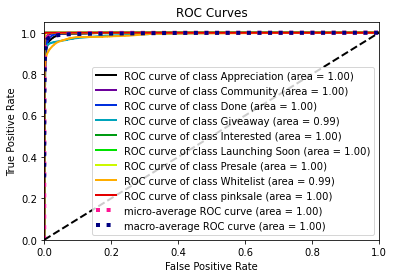

In [74]:
sktplt.metrics.plot_roc(y_test,lr_prob) #Logistic Regression ROC Curves
roc_auc_score(y_test,lr_prob,multi_class='ovo')

0.998535862404754

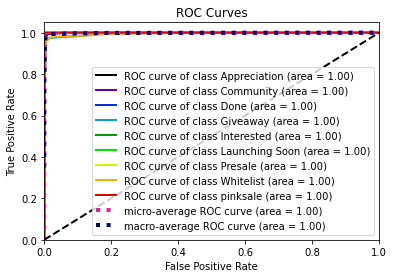

In [76]:
sktplt.metrics.plot_roc(y_test,rfc_prob) # Random Forest Classifier ROC Curves
roc_auc_score(y_test,rfc_prob,multi_class='ovo')

0.9889618568638269

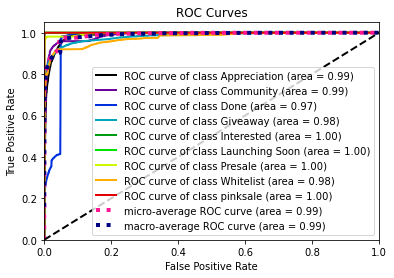

In [77]:
sktplt.metrics.plot_roc(y_test,mnb_prob) #Multinomial Naive Bayes ROC Curves
roc_auc_score(y_test,mnb_prob,multi_class='ovo')

0.990623107665511

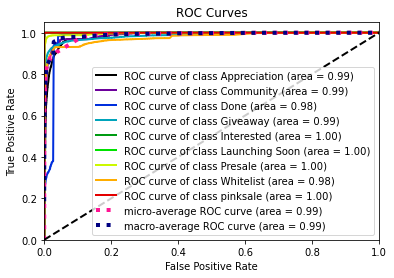

In [78]:
sktplt.metrics.plot_roc(y_test,cnb_prob) #Complement Naive Bayes ROC Curves
roc_auc_score(y_test,cnb_prob,multi_class='ovo')

###### ROC score for all the Models are good with all classes and random forest has the best result.

### SO SAVING THE BEST MODEL = Random Forest Classifier

In [79]:
import joblib
joblib.dump(rfc,"Tweet_text.pkl")

['Tweet_text.pkl']

### Loading The Model

In [80]:
mod=joblib.load("Tweet_text.pkl")

In [81]:
loaded_model = mod.predict(x_test)
loaded_model

array(['Launching Soon', 'Whitelist', 'Appreciation', ..., 'Appreciation',
       'Community', 'Launching Soon'], dtype=object)

In [84]:
import numpy as np
a = np.array(df_test['tweet_text'])
predicted = np.array(loaded_model)
df = pd.DataFrame(zip(a,predicted), columns = ["Test_tweet_text","Predicted_tweet_intent"])
df

,Test_tweet_text,Predicted_tweet_intent
0,"num, ðÿ,,â, xnumd â,,ï, xnumf ,wizardia nfts ,...",Launching Soon
1,"don,t miss chance win nft worth numeach simple...",Whitelist
2,zesty faucet making tweet claim free nefty tok...,Appreciation
3,"num, ðÿ,,â, xnumd â,,ï, xnumf ,wizardia nfts ,...",Giveaway
4,"message me, letâ,,s talk marketing project",Giveaway
...,...,...
31084,"company universe solving this, we,ve got colum...",Interested
31085,many get rekt nft,Whitelist
31086,"num, dollarshodl ,hodl hand ,nft fund stay pro...",Appreciation
31087,love job,Done
